# Project: Data Analysis of  <i>WeRateDogs</i> Twitter Account Data


**Table of Contents:**
<ul>
    <li><a href='#introduction'> Introduction </a></li>
    <li><a href='#data gathering'> Data Gathering </a></li>
    <li><a href='#data assessment'> Data Assessment </a></li>
    <li><a href='#data cleaning'> Data Cleaning </a></li>
    <li><a href='#data storing'> Data Storing </a></li>
    <li><a href='#eda'> Exploratory Data Analysis </a></li>
</ul>


<a id='introduction'></a>

# INTRODUCTION

> <u>**List of Data Sets:**</u> <ol>
    <li>Twitter Archive Enhanced</li>
    <li>Image Predictions</li>
    <li>tweet Json</li>
    
    
> **1. Twitter Archive Enhanced (.csv):** <ul><li>
    **Dataset Source:** [Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) <li>
> **Description of Dataset:**   
This data set contains the basic tweet data for all 5000+ of their (WeRateDogs) tweets as of the time it was extracted, but not everything. However, from the first column, records for the rest columns were extracted to make it enhanced.<li>
    > **Variable (Column) Information:** <br>
> There are seventeen (17) columns in this data set:
> <ol>
    <li> tweet_id: The last part of the tweet URL after "status/"
    <li> in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's ID
    <li> in_reply_to_user_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's author ID
    <li> timestamp: The time the tweet was posted
    <li> source: URL source for each tweet
    <li> text: Tweet content
    <li> retweeted_status_id: Id of the tweet which was retweeted by this one. Empty if the current tweet is not a retweet. 
    <li> retweeted_status_user_id: The identity of the author that retweeted
    <li> retweeted_status_timestamp: The time the retweeted status was made
    <li> expanded_urls: Absolute tweet URL
    <li> rating_numerator: Dog rating by users (numerator)
    <li> rating_denominator: Dog rating by users (denominator)
    <li> name: Name/breed of the dog
    <li> doggo: Indicates if the dog stage is doggo
    <li> floofer: Indicates if the dog stage is floofer
    <li> pupper: Indicates if the dog stage is pupper
    <li> puppo: Indicates if the dog stage is puppo
 </ol> 
    
      
> **2. Image Predictions (.tsv):** <ul><li>
    **Dataset Source:** [Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) <li>
> **Description of Dataset:**   
This data set contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). Gotten via a neutral network.<li>
    > **Variable (Column) Information:** <br>
> There are twelve (12) columns in this data set:
> <ol>
    <li> jpg_url:  Website address of the image.
    <li> img_num:  The image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
    <li> p1:  The algorithm's prediction for the image in the tweet.
    <li> p1_conf:  How confident the algorithm is in its prediction.
    <li> p1_dog:  Whether or not the prediction is a breed of dog.
    <li> p2:  The algorithm's second most likely prediction.
    <li> p2_conf:  How confident the algorithm is in its second prediction.
    <li> p2_dog:  Whether or not the second prediction is a breed of dog.
    <li> p3:  Algorithm's third most likely prediction.
    <li> p3_conf:  How confident the algorithm is in its third prediction.
    <li> p3_dog:  Whether or not the third prediction is a breed of dog.
 </ol> 
    
      
> **3. Tweet Json (.txt):** <ul><li>
    **Dataset Source:** [WeRateDogs - Twitter](https://twitter.com/dog_rates) <li>
> **Description of Dataset:**   
This data set contains addtional information related to enhanced twitter data set such as; tweet ID, retweet count, and favorite count which will aid the overall data analysis process.<li>
    > **Variable (Column) Information:** <br>
> There are three (3) columns in this data set:
> <ol>
    <li> tweet_id: The last part of the tweet URL after "status/" for each tweet
    <li> retweet_count: Number of retweets
    <li> favourite_count: The number of tweets that given user has marked as favorite
 </ol> 


### <u> Analysis Questions: </u>
> Which dog had the highest rating and what were the factors responsible? <br> <ul>
> <b>supporting questions:</b>
> <ul> <li> Which breed of dog had the highest rating (with confidence level)? </li>
    <li> The dogs with the highest ratings were in what stage? </li>
    <li> Was there a correlation with the dog rating and number of retweeted tweet count and favorite count? </li> </ul>
    


In [1]:
# needed modules
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
import tweepy 
from tweepy import OAuthHandler
import json
%matplotlib inline


<a id='data gathering'></a>

# DATA GATHERING

<b>1. Twitter Archive Enhanced via Download:</b>

In [2]:
# read data set
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')

# confirm
twt_archive.head(2)

#confirm length of id/tweet_id record
# len(str(twt_archive['tweet_id'][0]))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<b>2. Image Predictions (downloaded programmatically):</b>

In [3]:
# data set web address
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# send request for file 
get_imgfile = rq.get(url)

# write recieved file content to flatfile using the context manager
with open('image_predictions.tsv', 'wb') as flatfile:
    flatfile.write(get_imgfile.content)
    
# read flatfile as dataframe
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

# inspect
img_pred.sort_values('tweet_id', ascending=False).head()

#confirm length of id/tweet_id record
# len(str(img_pred['tweet_id'][0]))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<b>3. Additional Tweets Data (downloaded programmatically via API):</b>

<i><b> note: I have comment out the API code below to allow seamless reading and running of this data analysis report since I have already gotten the needed data set </b></i>

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

#Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twt_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# print(fails_dict)

In [5]:
# list of needed columns
columns_of_interest =['id', 'favorite_count', 'retweet_count']

# list to group refined json data
list_of_dicts = []

# extract needed keys and values from .txt file with json data
with open('tweet-json.txt', 'r') as flatfile:
    for line in flatfile:
        jfile = json.loads(line)
        create_dict = {key:value for key, value in jfile.items() if key in columns_of_interest}
        list_of_dicts.append(create_dict)
        
# covert list of dicts to dataframe
api_data = pd.DataFrame(list_of_dicts)

# inspect
api_data.head()

#confirm length of id/tweet_id record
# len(str(api_data['id'][0]))

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<b> Summary:</b> <br>
> We have gathered all three files needed for this analysis and read them in as dataframes using pandas: <ol>
    <li> Twitter Archive Enhanced as twt_archive </li>
    <li> Image Predictions as img_pred </li>
    <li> Additional Twitter Data as api_data</li>

<a id='data assessment'></a>

# DATA ASSESSMENT

<b>note:</b> <i>this assessment focuses primarily on the columns of interest with respect to the questions this analysis intends to answer</i>

<b>1. Twitter Archive Enhanced Dataset:</b>
><b> Visual Assessment </b>

In [6]:
twt_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Some cumbersome column names (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, rating_numerator, rating_denominator, expanded_urls). [Quality issue]
- Character casing inconsistent in name column. [Quality issue]
- Multiple columns for one variable (doggo, floofer, pupper, and puppo are all dog stages). [Tidiness issue]
- There should be one variable for rating. [Tidiness issue]

> <b> Programmatic Assessment: </b><br>

General property of data set

In [7]:
# summary of data set
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Dimension of data set

In [8]:
# get the dimension of the df
twt_archive.shape

(2356, 17)

In [9]:
# get number of missing values
twt_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

- Missing values in six (6) columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp). [Quality issue]
- Unideal data types (timestamp, retweeted_status_timestamp). [Quality issue]
- Multiple observational units in one table (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, tweet_id). [Tidiness issue]

In [10]:
# preview sample records in retweeted_status_id column
display(twt_archive[(~twt_archive['retweeted_status_id'].isnull())].head(10))

# preview sample records in in_reply_to_status_id column
display(twt_archive[(~twt_archive['in_reply_to_status_id'].isnull())].head())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


- Inconsistent exponential index in (retweeted_status_user_id, and in_reply_to_user_id) columns. [Quality issue]
- Extraneous decimal places in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,	and retweeted_status_user_id) columns. [Qulaity issues]

Check for duplicates

In [11]:
# Check if there's any duplicate
twt_archive.duplicated().any()

False

<b>Remark:</b> No duplicated records

Check for count of unique values

In [12]:
twt_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

<b>Remark:</b><br>
- There were 40 types of numerator rating scores
- There were 18 types of numerator rating scores

These could require some unification to aid better exploration

In [13]:
twt_archive.name.isna().any()

False

In [14]:
# get and sort unique values in name columns
a = np.sort(twt_archive.name.unique())

# create list of values less than 3
b = [i for i in a if len(str(i)) < 3]

# check
b

['Al', 'Bo', 'Ed', 'JD', 'Jo', 'Mo', 'O', 'a', 'an', 'by', 'my']

Summary Statistics

In [15]:
twt_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Focusing on the rating columns

In [16]:
# slice columns accordingly
twt_archive.iloc[:,np.r_[10,11]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


<b>Remark:</b> The value 10 seem to be significantly present in the rating_denominator column. While the values 11 and 12 seem to be significantly present in the rating_numerator.

Check significance of the value 10 in the rating_denominator

In [17]:
twt_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

<b>Remark:</b> The value 10 seems to be most significant under the rating_denominator column.

Check for the significance of the values 11 and 12 for the rating_numerator column

In [18]:
twt_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

<b>Remark:</b> Values are not significantly spread across the field

There seem to be some outliers in the 'rating_numerator' records. Values greater than 14 had insignificant count. It seems reasonble to assign values greater than 14 to 14

<b>Remark:</b> Values greater than 14 will be assigned 14.

<b>Rationale:</b> Due to the statement below, given as part of the instruction of this project, the numerator and denominator ratings discrepancies will not be addressed.<br>

<i>The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.</i>

<b>2. Image Predictions Dataset:</b>
><b> Visual Assessment </b>

In [19]:
# preview data set
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Character casing not consistent in multiple columns (p1, p2, and p3). [Quality issue]
- Some records for dog breeds were incorrect. [Quality issue]
- Confidence level may be best represented in percentage format. [Quality issue]
- There should be one variable for px, px_conf, px_dog. [Tidiness issue]

> <b> Programmatic Assessment: </b>

In [20]:
# generic overview of data set
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<b>Remark:</b> There are no missing values. Data types seem fine.

Check data set dimension

In [21]:
# get dataframe dimension
img_pred.shape

(2075, 12)

Check for duplicates

In [22]:
# Check if there are any duplicates
img_pred.duplicated().any()

False

<b>Remark: </b> There are no duplicates

Check for unique values

In [23]:
img_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

<b>Remark:</b> <br>
- Some images were sent/uploaded from a previous URL.
- Users had a maximum of four (4) images to uploade.

Summary Statistics

In [24]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<b>Remark:<b/><br>
- The first image uploaded by the user seem to have the most correct prediction.
- Highest confidence level of prediction 2 and 3 were 48% and 27% respectively which is significantly weak in contrast to prediction 1 with 100%.
- Over the majority of prediction 2 and 3 fall below the average of 50%. 19% for p2 and 9% for p3, compared to p1.

<b>3. Additional Twitter Data from API:</b>
><b> Visual Assessment </b>

In [25]:
# dataframe overview
api_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


- Column name inconsistency ('id' should be 'tweet_id'). [Quality issue]

> <b>Programmatic Assessment</b>

In [26]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<b>Remark:</b> <br>
- No missing value
- Data type seem right

Check for duplicates

In [27]:
# check for duplicates
api_data.duplicated().any()

False

<b>Remark:</b> There are no duplicate records

Check for unique values

In [28]:
# check unique
api_data.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

Summary Statistics

In [29]:
# check summary statistics
api_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<b>Remark:</b><br>
- favorite count is relatively higher than retweet count

<b>Summary of Assessment</b><br>
> <b>Quality issues:</b><br>
Twitter Archive Enhanced: 
><ol><li> Some cumbersome column names (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, rating_numerator, rating_denominator). </li>
    <li> Character casing inconsistent in name column. </li>
    <li>Missing values in six (6) columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, expanded_urls). </li><li> Unideal data types (timestamp, retweeted_status_timestamp).</li>
    <li> Inconsistent exponential index in (retweeted_status_user_id, and in_reply_to_user_id) columns.</li><li> Extraneous decimal places in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id) columns.</li></ol>
Image Predictions:
> <ol>
    <li>Character casing not consistent in multiple columns (p1, p2, and p3).</li>
    <li>Some records for dog breeds were incorrect. </li>
    <li>Confidence level may be best represented in percentage format.</li></ol>
Additional Twitter Data form API:
> <ol>
    <li>Column name inconsistency ('id' should be 'tweet_id'). </li></ol>
> <b>Tidiness issues:</b><br>
Twitter Archive Enhanced: 
><ol><li>Multiple columns for one variable (doggo, floofer, pupper, and puppo are all dog stages).</li>
    <li>Multiple observational units in one table (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, tweet_id).</li>
    <li>There should be one variable for rating.</li></ol>
Image Predictions:
><ol><li>There should be one variable for px, px_conf, px_dog. </li></ol>
><b>Total:</b> 10 quality and 4 tidiness issues were identified. Making a total of 14 issues.</b>
    


<a id='data cleaning'></a>

# DATA CLEANING

> <b>1. Twitter Archive Enhanced:</b>

<b>Define: </b>

1. Rename cumbersome column names (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, rating_numerator, rating_denominator) to (reply_statusID, reply_userID, retweeted_statusID, retweeted_userID, retweeted_timestamp, rating_num, rating_den).
2. Capitalize all name column variables.
3. Replace and drop missing values accordingly in six (6) columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls).
4. Change data types of (timestamp, retweeted_status_timestamp) to datetime.
5. Round inconsistent exponential index to 18 in (retweeted_status_user_id, and in_reply_to_user_id) columns.
6. Round extraneous decimal places to 18 in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id) columns.
7. Convert all dog stages variables to one variable/column called dog_stage (doggo, floofer, pupper, and puppo are all dog stages).
8. Create separate tables for these observational units (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, tweet_id).
9. Create a single column for rating by dividing rating_denominator by rating_numerator.

<b>Code:</b>

In [30]:
# create duplicate for safe keeping
twt_arc = twt_archive.copy()

# preview 
# twt_arc.head(2)

1. Rename cumbersome column names (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, rating_numerator, rating_denominator) to (reply_statusID, reply_userID, retweeted_statusID, retweeted_userID, retweeted_timestamp, rating_num, rating_den).

In [31]:
# rename cumbersome column name
twt_arc = twt_arc.rename(columns={'tweet_id':'tweet_ID',
                                  'in_reply_to_status_id':'reply_statusID', 
                                  'in_reply_to_user_id':'reply_userID',
                                 'retweeted_status_id':'retweeted_statusID',
                                  'retweeted_status_user_id':'retweeted_userID',
                                 'retweeted_status_timestamp':'retweeted_timestamp',
                                 'rating_numerator':'rating_num',
                                 'rating_denominator':'rating_den'})

2. Capitalize all 'name' column variables.

In [32]:
# make all first letters of name variable uppercase
twt_arc.name = twt_arc.name.str.title()

3. Replace and drop missing values accordingly in six (6) columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_id_timestamp, expanded_urls).

ID columns values are expected to be unique. As such, filling them with best guesses or aggregated values will not suffice. Also, there is no way to get research and get these values at the moment. Therefore, I have opted to fill them all with zeros (0). Alternatively, I could drop these columns as they have relatively few records, plus they are irrelevant to my anlysis. But I consider that a bit extreme at this time plus these are unique identifies.  

In [33]:
# fill missing values with zero (0)
twt_arc.fillna({'reply_statusID':0, 'reply_userID':0, 'retweeted_statusID':0,
               'retweeted_userID':0,}, inplace=True)

In [34]:
# get total number of missing values in the 'retweeted_timestamp' column
twt_arc['retweeted_timestamp'].isna().sum()

2175

There are over 2000 missing values under the 'retweeted_timestamp' column. I will be dropping this column since the number of missing values is significantly large thereby making its records negligible plus replacing with guesses will not be sufficient and can be considered data fraud since it's related to the time a retweet was made. Also, it will not be useful for my analysis.

In [35]:
# drop retweeted_timestamp column
twt_arc.drop('retweeted_timestamp', axis=1, inplace=True)

In [36]:
twt_arc.head(1)

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [37]:
# check number of missing values for the 'expanded_urls' column
twt_arc['expanded_urls'].isna().sum()

59

There are 59 missing values in the 'expanded_urls' column

In [38]:
# check number of duplicates for the 'expanded_urls' column
twt_arc['expanded_urls'].duplicated().sum()

137

There are 137 duplicated values in the 'expanded_urls' column. 

Check indexes of 'expanded_urls' missing values

In [39]:
twt_arc[twt_arc['expanded_urls'].isna()].head()

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,0.0,0.0,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,0.0,0.0,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,0.0,0.0,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,0.0,0.0,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,0.0,0.0,NaN,12,10,None,None,None,None,None


The missing values in 'expanded_urls' are widely distributed. As such, filling them with their closest 'neigbour' will suffice in this case since the missing values are minute in number and there are more duplicate values than missing values for this variable. Also, this variable will not be used in this analysis. 

In [40]:
# fill missing values with their nearest 'neighbour'
twt_arc['expanded_urls'].fillna(method='ffill', inplace=True)

4. Change data types of (timestamp, retweeted_status_timestamp) to datetime. 

<i><b>note:</b>The 'retweeted_status_timestamp' column has been dropped previously as such only the data type of timestamp will be converted.</i>

In [41]:
# change data type to datetime
twt_arc.timestamp=pd.to_datetime(twt_arc.timestamp)

5. Round inconsistent exponential index to 18 in (retweeted_status_user_id, and in_reply_to_user_id) columns.

6. Round extraneous decimal places to 18 in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id) columns.

This is because the 'tweet_id' column has 18 characters and I will like to maintain a consistent number of characters for all ID columns. 
This is not particularly necessary though.

Check maximum characters for ID variables

In [42]:
twt_arc.describe()

,tweet_ID,reply_statusID,reply_userID,retweeted_statusID,retweeted_userID,rating_num,rating_den
count,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2356.000000,2356.000000
mean,7.427716e+17,2.468150e+16,6.668307e+14,5.931207e+16,9.539364e+14,13.126486,10.455433
std,6.856705e+16,1.341142e+17,2.293821e+16,2.063701e+17,2.674393e+16,45.876648,6.745237
min,6.660209e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.783989e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,10.000000
50%,7.196279e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.000000,10.000000
75%,7.993373e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [43]:
# function to truncate and covert values to integer for a series
def trunc_value(series, t_number):
    ''' 
    this function takes two arguments; a series and a number (n). 
    which it use to truncate an extraneous value and convert it to an integer data type.
    Inplace.
    '''
    series = [np.trunc(10**t_number * i)/10**t_number for i in series]
    series = [int(i) for i in series]
    return series
    
twt_arc['reply_statusID'] = trunc_value(twt_arc['reply_statusID'], 17)
twt_arc['reply_userID'] = trunc_value(twt_arc['reply_userID'], 17)
twt_arc['retweeted_statusID'] = trunc_value(twt_arc['retweeted_statusID'], 17)
twt_arc['retweeted_userID'] = trunc_value(twt_arc['retweeted_userID'], 17)

    

7. Convert all dog stages variables to one variable/column called dog_stage (doggo, floofer, pupper, and puppo are all dog stages).

In [44]:
# create default column for dog stage
twt_arc['dog_stage'] = twt_arc['name']

# function to assign dog stage from multiple columns
def assign_val(stg1,stg2,stg3,stg4,r_val):
    
    # assign conditions
    conditions = [
        twt_arc.doggo.eq(stg1) 
        & twt_arc.floofer.eq(stg2) 
        & twt_arc.pupper.eq(stg3)
        & twt_arc.puppo.eq(stg4)
    ]
    
    # list out return values
    return_values = [
        str(r_val)
    ]
    
    # assign values to column
    twt_arc['dog_stage'] = np.select(conditions, return_values, default=twt_arc['dog_stage'])
    
assign_val('doggo','None','None','None','Doggo')
assign_val('doggo','floofer','None','None','Indefinite')
assign_val('doggo','None','pupper','None','Indefinite')
assign_val('doggo','None','None','puppo','Indefinite')
assign_val('None','floofer','None','None','Floofer')
assign_val('None','floofer','pupper','None','Indefinite')
assign_val('None','floofer','None','puppo','Indefinite')
assign_val('None','None','pupper','None','Pupper')
assign_val('none','None','pupper','puppo','Indefinite')
assign_val('None','None','None','puppo','Puppo')
assign_val('None','None','None','None','unclassified')


Drop individual dog stages

In [45]:
twt_arc.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

8. Create separate tables for these observational units (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, tweet_id).

This may not be necessary at this time. Nevertheless, I will create sub-dataframes for each of these unique observational units

In [46]:
# sub-df for 'in_reply_to_status_id'
in_reply_to_status_id = twt_arc.iloc[:, np.r_[1,3,4,5,8,9,10,11,12]]

# sub-df for 'in_reply_to_user_id'
in_reply_to_user_id = twt_arc.iloc[:, np.r_[2,3,4,5,8,9,10,11,12]]

# sub-df for 'retweeted_status_id'
retweeted_status_id = twt_arc.iloc[:, np.r_[3,4,5,6,8,9,10,11,12]]

# sub-df for 'retweeted_status_user_id'
retweeted_status_user_id = twt_arc.iloc[:, np.r_[3,4,5,7,8,9,10,11,12]]

9. Create a single column for rating by dividing rating_denominator by rating_numerator.

In [47]:
# create new rating column
twt_arc['rating'] = twt_arc['rating_num']/twt_arc['rating_den']

<b>Test</b>

1.

In [48]:
# print first 2 rows
twt_arc.head(2)

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified,1.3
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unclassified,1.3


2.

In [49]:
twt_arc.name.unique()

twt_arc[twt_arc.name == 'None'].head(2)

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
5,891087950875897856,0,0,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,0,0,https://twitter.com/dog_rates/status/891087950...,13,10,None,unclassified,1.3
7,890729181411237888,0,0,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,0,0,https://twitter.com/dog_rates/status/890729181...,13,10,None,unclassified,1.3


3.

In [50]:
# confirm replacement of missing values
twt_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_ID            2356 non-null   int64              
 1   reply_statusID      2356 non-null   int64              
 2   reply_userID        2356 non-null   int64              
 3   timestamp           2356 non-null   datetime64[ns, UTC]
 4   source              2356 non-null   object             
 5   text                2356 non-null   object             
 6   retweeted_statusID  2356 non-null   int64              
 7   retweeted_userID    2356 non-null   int64              
 8   expanded_urls       2356 non-null   object             
 9   rating_num          2356 non-null   int64              
 10  rating_den          2356 non-null   int64              
 11  name                2356 non-null   object             
 12  dog_stage           2356 non-null 

4.

In [51]:
# check data type for 'timestamp' column
twt_arc.dtypes

tweet_ID                            int64
reply_statusID                      int64
reply_userID                        int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
retweeted_statusID                  int64
retweeted_userID                    int64
expanded_urls                      object
rating_num                          int64
rating_den                          int64
name                               object
dog_stage                          object
rating                            float64
dtype: object

5 & 6

In [52]:
# check for 'retweeted_statusID' column
display(twt_arc[twt_arc['retweeted_statusID'] != 0].head(5))

# check for all columns concerned
display(twt_arc[(twt_arc['reply_statusID'] != 0) | 
                (twt_arc['retweeted_statusID'] != 0)].head(4))

# check for 'reply_statusID'
display(twt_arc[twt_arc['reply_statusID'] != 0].head(3))

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
19,888202515573088257,0,0,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,unclassified,1.3
32,886054160059072513,0,0,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,https://twitter.com/dog_rates/status/886053434...,12,10,None,unclassified,1.2
36,885311592912609280,0,0,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,unclassified,1.3
68,879130579576475649,0,0,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712,4196983835,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,unclassified,1.4
73,878404777348136964,0,0,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478208,4196983835,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,unclassified,1.3


,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
19,888202515573088257,0,0,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,unclassified,1.3
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,0,0,https://twitter.com/dog_rates/status/886366144...,12,10,None,unclassified,1.2
32,886054160059072513,0,0,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,https://twitter.com/dog_rates/status/886053434...,12,10,None,unclassified,1.2
36,885311592912609280,0,0,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,unclassified,1.3


,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,0,0,https://twitter.com/dog_rates/status/886366144...,12,10,None,unclassified,1.2
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,0,0,https://twitter.com/dog_rates/status/881666595...,17,10,None,unclassified,1.7
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,0,0,https://twitter.com/dog_rates/status/879862464...,14,10,None,unclassified,1.4


7.

In [53]:
# check unique values
display(twt_arc['dog_stage'].unique())

#  check value counts
display(twt_arc['dog_stage'].value_counts())

array(['unclassified', 'Doggo', 'Puppo', 'Pupper', 'Floofer',
       'Indefinite'], dtype=object)

unclassified    1976
Pupper           245
Doggo             83
Puppo             29
Indefinite        14
Floofer            9
Name: dog_stage, dtype: int64

8.

<i>This can further be re-arranged but that will not be necessary for now.</i>

In [54]:
# sub-df for 'in_reply_to_status_id'
display(in_reply_to_status_id.head(1))

# sub-df for 'in_reply_to_user_id'
display(in_reply_to_user_id.head(1))

# sub-df for 'retweeted_status_id'
display(retweeted_status_id.head(1))

# sub-df for 'retweeted_status_user_id'
display(retweeted_status_user_id.head(1))

,reply_statusID,timestamp,source,text,expanded_urls,rating_num,rating_den,name,dog_stage
0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified


,reply_userID,timestamp,source,text,expanded_urls,rating_num,rating_den,name,dog_stage
0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified


,timestamp,source,text,retweeted_statusID,expanded_urls,rating_num,rating_den,name,dog_stage
0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified


,timestamp,source,text,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage
0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified


9.

In [55]:
# preview df
twt_arc.head(1)

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,rating_den,name,dog_stage,rating
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unclassified,1.3


> <b>2. Image Predictions</b>

<b>Define:</b>

1. Capitalize all values in columns (p1, p2, and p3).
2. create individual columns with perfect records for p1, p2, and p3.
3. represent confidence level in percentage format.

<b>Code:</b>

In [56]:
# create copy
img_prd = img_pred.copy()

1. Capitalize all values in columns (p1, p2, and p3).

In [57]:
# capitalize column p1 values
img_prd.p1 = img_prd.p1.str.title()

# capitalize column p2 values
img_prd.p2 = img_prd.p2.str.title()

# capitalize column p3 values
img_prd.p3 = img_prd.p3.str.title()

2. create individual columns with perfect records for p1, p2, and p3. i.e create new columns for dog breed and confidence level with the best predictions.

Create a dog breed column that compares values from the top 3 predictions and picks the one that is true with precedence set to start from first, second, then third prediction.

In [58]:
# create default column 
img_prd['p11'] = img_prd['p1']

# function to assign dog breed from multiple columns condition
def assign(stg1,stg2,stg3,r_val):
    
    # assign conditions
    conditions = [
        img_prd['p1_dog'].eq(stg1) 
        &img_prd['p2_dog'].eq(stg2)
        &img_prd['p3_dog'].eq(stg3)
    ]
    
    # list out return values
    return_values = [
        r_val
    ]
    
    # assign values to column
    img_prd['p11'] = np.select(conditions, return_values, default=img_prd['p11'])
    
assign(True,False,False,img_prd['p1'])
assign(False,True,True,img_prd['p2'])
assign(False,True,False,img_prd['p2'])
assign(False,False,True,img_prd['p3'])
assign(False,False,False,'Unclassified')

Another function for confidence level

In [59]:
# create default column 
img_prd['conf_level'] = img_prd['p1_conf']

# function to assign dog breed from multiple columns condition
def conf_assign(stg1,stg2,stg3,r_val):
    
    # assign conditions
    conditions = [
        img_prd['p1_dog'].eq(stg1) 
        &img_prd['p2_dog'].eq(stg2)
        &img_prd['p3_dog'].eq(stg3)
    ]
    
    # list out return values
    return_values = [
        r_val
    ]
    
    # assign values to column
    img_prd['conf_level'] = np.select(conditions, return_values, default=img_prd['conf_level'])
    
conf_assign(True,False,False,img_prd['p1_conf'])
conf_assign(False,True,True,img_prd['p2_conf'])
conf_assign(False,True,False,img_prd['p2_conf'])
conf_assign(False,False,True,img_prd['p3_conf'])
conf_assign(False,False,False,img_prd['p1_conf'])

Rename column

In [60]:
# rename some columns
img_prd = img_prd.rename(columns = {'tweet_id':'tweet_ID',
                         'p11':'dog_breed'})

Drop irrelevant columns

In [61]:
# drop columns
img_prd.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
             'p3','p3_conf','p3_dog'], axis=1, inplace=True)

3. Represent confidence level in percentage format.

In [62]:
# create column for confidence level in percentage
img_prd['conf_percentage'] = np.trunc((img_prd['conf_level'] * 100)).astype(int)

<b>Test:</b>

1. 

In [63]:
# preview df
img_prd.head()

,tweet_ID,jpg_url,img_num,dog_breed,conf_level,conf_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,46
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,50
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,59
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,40
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,56


2.

In [64]:
# preview
display(img_prd.head(1))

# preview
display(img_prd['dog_breed'].unique())

,tweet_ID,jpg_url,img_num,dog_breed,conf_level,conf_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,46


array(['Welsh_Springer_Spaniel', 'Redbone', 'German_Shepherd',
       'Rhodesian_Ridgeback', 'Miniature_Pinscher',
       'Bernese_Mountain_Dog', 'Unclassified', 'Chow', 'Golden_Retriever',
       'Miniature_Poodle', 'Gordon_Setter', 'Walker_Hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_Setter', 'Italian_Greyhound',
       'Maltese_Dog', 'Newfoundland', 'Malamute',
       'Soft-Coated_Wheaten_Terrier', 'Chihuahua',
       'Black-And-Tan_Coonhound', 'Toy_Terrier', 'Blenheim_Spaniel',
       'Pembroke', 'Irish_Terrier', 'Chesapeake_Bay_Retriever',
       'Curly-Coated_Retriever', 'Dalmatian', 'Ibizan_Hound',
       'Border_Collie', 'Labrador_Retriever', 'Miniature_Schnauzer',
       'Airedale', 'Rottweiler', 'West_Highland_White_Terrier',
       'Toy_Poodle', 'Giant_Schnauzer', 'Vizsla', 'Siberian_Husky',
       'Papillon', 'Saint_Bernard', 'Tibetan_Terrier', 'Borzoi', 'Beagle',
       'Yorkshire_Terrier', 'Pomeranian', 'Kuvasz',
       'Flat-Coated_Retriever', 'Norwegian_Elkhoun

3.

In [65]:
# preview
img_prd.head()

,tweet_ID,jpg_url,img_num,dog_breed,conf_level,conf_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,46
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,50
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,59
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,40
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,56


> <b>Additional Twitter Data form API</b>

<b>Define:</b>

1. Column name inconsistency ('id' should be 'tweet_id').

<b>Code:</b>

In [66]:
# duplicate df
api = api_data.copy()

In [67]:
# rename column
api = api.rename(columns = {'id':'tweet_ID'})

<b>Test:</b>

In [68]:
# preview
api.head()

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Check dimension of all 3 dataframes

In [69]:
# see dimension of twt_arc
display(twt_arc.shape)

# see dimension of img_prd
display(img_prd.shape)

# see dimension of api
display(api.shape)

(2356, 14)

(2075, 6)

(2354, 3)

Merge all 3 dataframes together.

In [70]:
# merge dfs
master = twt_arc.merge(img_prd, on='tweet_ID', how='inner')\
                       .merge(api, on='tweet_ID', how='inner')

# check new df dimension
master.shape

(2073, 21)

In [71]:
# preview data set
master.head(3)

,tweet_ID,reply_statusID,reply_userID,timestamp,source,text,retweeted_statusID,retweeted_userID,expanded_urls,rating_num,...,name,dog_stage,rating,jpg_url,img_num,dog_breed,conf_level,conf_percentage,retweet_count,favorite_count
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,0,https://twitter.com/dog_rates/status/892420643...,13,...,Phineas,unclassified,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unclassified,0.097049,9,8853,39467
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,0,https://twitter.com/dog_rates/status/892177421...,13,...,Tilly,unclassified,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,32,6514,33819
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,0,https://twitter.com/dog_rates/status/891815181...,12,...,Archie,unclassified,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,71,4328,25461


Brief assessment

In [72]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_ID            2073 non-null   int64              
 1   reply_statusID      2073 non-null   int64              
 2   reply_userID        2073 non-null   int64              
 3   timestamp           2073 non-null   datetime64[ns, UTC]
 4   source              2073 non-null   object             
 5   text                2073 non-null   object             
 6   retweeted_statusID  2073 non-null   int64              
 7   retweeted_userID    2073 non-null   int64              
 8   expanded_urls       2073 non-null   object             
 9   rating_num          2073 non-null   int64              
 10  rating_den          2073 non-null   int64              
 11  name                2073 non-null   object             
 12  dog_stage           2073 non-null 

In [73]:
master.describe()

,tweet_ID,reply_statusID,reply_userID,retweeted_statusID,retweeted_userID,rating_num,rating_den,rating,img_num,conf_level,conf_percentage,retweet_count,favorite_count
count,2.073000e+03,2.073000e+03,2.073000e+03,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,7.742237e+15,4.656567e+07,2.920433e+16,3.798659e+14,12.265798,10.511819,1.169987,1.203570,0.547893,54.278823,2976.089243,8556.718283
std,6.780118e+16,7.324912e+16,4.397275e+08,1.472009e+17,1.729537e+16,40.699924,7.180517,3.988880,0.561856,0.297916,29.770639,5054.897526,12098.640994
min,6.660209e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,0.000000,1.000000,0.000010,0.000000,16.000000,0.000000
25%,6.764706e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,10.000000,1.000000,1.000000,0.298881,29.000000,634.000000,1674.000000
50%,7.119681e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.000000,10.000000,1.100000,1.000000,0.541780,54.000000,1408.000000,3864.000000
75%,7.931959e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12.000000,10.000000,1.200000,1.000000,0.821120,82.000000,3443.000000,10937.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,100.000000,79515.000000,132810.000000


In [74]:
master.duplicated().any()

False

<a id='data storing'></a>

# DATA STORING

In [75]:
# export df as CSV
# master.to_csv('twitter_archive_master.csv')

<a id='eda'></a>

# EXPLORATORY DATA ANALYSIS

<b>Questions to answer:</b><ul>
- Which dog had the highest rating (name)?
- Which breed of dog had the highest rating (with confidence level)?
- The dogs with the highest ratings were in what stage?
- Was there a correlation with the dog rating and number of retweeted tweet count and favorite count?</ul>

<b>Question 1. Which dog by name had the highest rating?</b>

In [76]:
# create duplicate copy of df
df = master.copy()

Drop columns that are not relevant to my analyis

In [77]:
# drop columns
df.drop(['reply_statusID',
         'reply_userID',
         'timestamp',
         'source',
         'text',
         'retweeted_statusID',
        'retweeted_userID',
        'expanded_urls',
        'jpg_url',
        ], axis=1, inplace=True)

In [78]:
# confirm dropped columns
df.head()

,tweet_ID,rating_num,rating_den,name,dog_stage,rating,img_num,dog_breed,conf_level,conf_percentage,retweet_count,favorite_count
0,892420643555336193,13,10,Phineas,unclassified,1.3,1,Unclassified,0.097049,9,8853,39467
1,892177421306343426,13,10,Tilly,unclassified,1.3,1,Chihuahua,0.323581,32,6514,33819
2,891815181378084864,12,10,Archie,unclassified,1.2,1,Chihuahua,0.716012,71,4328,25461
3,891689557279858688,13,10,Darla,unclassified,1.3,1,Labrador_Retriever,0.168086,16,8964,42908
4,891327558926688256,12,10,Franklin,unclassified,1.2,2,Basset,0.555712,55,9774,41048


Check unique values count in ratings column

In [79]:
df.rating.value_counts()

1.200000      477
1.000000      431
1.100000      419
1.300000      283
0.900000      151
0.800000       95
0.700000       51
1.400000       40
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
2.700000        1
7.500000        1
3.428571        1
1.500000        1
177.600000      1
0.818182        1
0.636364        1
2.600000        1
42.000000       1
Name: rating, dtype: int64

Ratings greater than 2 seems to be outliers

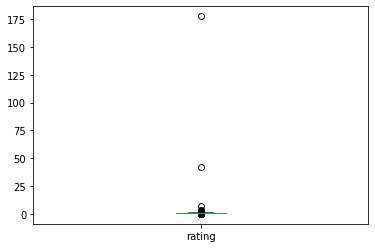

In [80]:
df.rating.plot(kind='box');

Check counts of ratings greater than 2

In [81]:
# check sum of counts for ratings greater than 2
np.sum(df.rating > 2)

6

In [193]:
# dimension of df
df.shape[0]

2067

The number of outlier values for ratings in comparison with records (2067 - 6 = 2061) in the df is negligible, as such, all df.rating > 2 will be dropped.

In [83]:
# Drop outliers in rating columns
df.drop(df[df.rating > 2].index, inplace = True)

Change all 'None' values in 'name' column to 'No_name'

In [168]:
# change 'None' to 'No_name' in name column
df.loc[df.name == 'None', 'name'] = 'No_name'

Check highest rating value

In [84]:
# get highest rating
df.rating.max()

1.5

Check counts for dog names with rating of 1.5

In [251]:
df[df.rating == 1.5].name.value_counts()

No_name    1
Name: name, dtype: int64

Theres's only one occurrence and the name of the dog is unknown. The next highest rating is 1.4

In [221]:
df[df.rating == 1.4].name.value_counts()

No_name     16
One          2
Walter       2
Sunny        2
Bo           2
Cassie       1
Ollie        1
Gary         1
Sundance     1
Gabe         1
Doobert      1
Smiley       1
Kuyu         1
Such         1
Iggy         1
General      1
Cermet       1
Clifford     1
Emmy         1
A            1
Laika        1
Name: name, dtype: int64

There are more dogs with rating of 1.4. So, we use 1.4 as benchmark for dog highest rating.

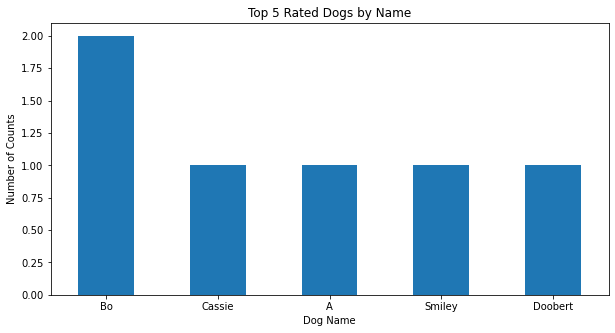

In [286]:
# filter dogs such that they have rating 1.4, a given name and known dog breed
top_name = df.loc[(df.rating == 1.4) 
               & (df.name != 'No_name')
               & (df['dog_breed'] != 'Unclassified')
               & (df['dog_stage'] != 'unclassified'),
                  'name']

# bar chart of top 5 dogs by name with highest rating.
top_name.value_counts()[:5].sort_values(ascending=False).plot(kind='bar',
                                                                  ylabel='Number of Counts',
                                                                  xlabel='Dog Name',
                                                                  title = 'Top 5 Rated Dogs by Name',
                                                                   figsize=(10,5),
                                                                  rot=0);

<b>Rationale:</b> The dog named Bo, had the highest rating and number of counts for with known dog stage and breed

<b>Question 2: Which breed of dog had the highest rating? (confidence level)</b>

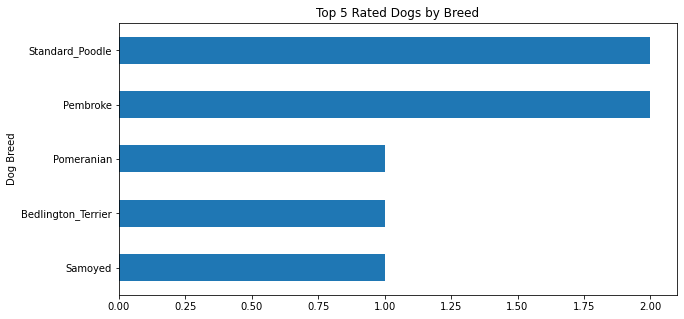

In [327]:
# top breed by value counts
top_breed = df.loc[(df.rating == 1.4) 
               & (df.name != 'No_name') 
               & (df['dog_stage'] != 'unclassified')
               & (df['dog_breed'] != 'Unclassified')]

# bar plot for top rated dogs by breed
top_breed['dog_breed'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh',
                                                                  xlabel='Dog Breed',
                                                                  title = 'Top 5 Rated Dogs by Breed',
                                                                   figsize=(10,5));                                                                   

Standard_Poodle (1st), Pembroke (2nd) and Pomeranian (3rd) happen to be the top 3 rated dog breeds.

Dog breeds by confidence level

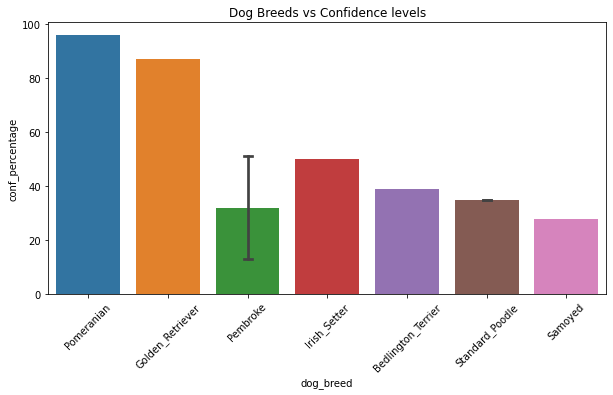

In [348]:
# filter df
top_breed = df.loc[(df.rating == 1.4) 
               & (df.name != 'No_name') 
               & (df['dog_stage'] != 'unclassified')
               & (df['dog_breed'] != 'Unclassified')]

# sort top_breed in descending order
top_breed_sorted = top_breed.sort_values('conf_percentage', ascending=False)

# plot bar chart via seaborn
plt.figure(figsize = (10,5))  # set figure size
sns.barplot(x='dog_breed',
            y='conf_percentage',
            data=top_breed_sorted,
            capsize=.1).set(title='Dog Breeds vs Confidence levels');

degrees = 45  # rotate xticks
plt.xticks(rotation=degrees);

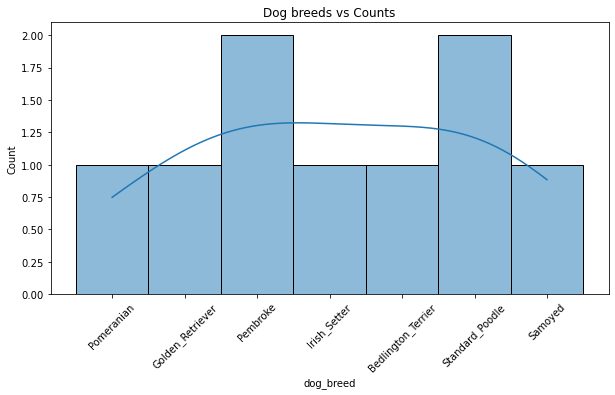

In [347]:
# plot histogram to see count distribution among breeds
plt.figure(figsize = (10,5))  # set figure size
sns.histplot(data=top_breed_sorted, x='dog_breed', kde=True).set(title='Dog breeds vs Counts');
degrees = 45  # rotate xticks
plt.xticks(rotation=degrees);

In [333]:
top_breed_name = df.loc[(df.rating == 1.4) 
               & (df.name == 'Bo')  # since Bo happens to be the name of the dog with most count
               & (df['dog_stage'] != 'unclassified')
               & (df['dog_breed'] != 'Unclassified')]


top_breed_name.head()

,tweet_ID,rating_num,rating_den,name,dog_stage,rating,img_num,dog_breed,conf_level,conf_percentage,retweet_count,favorite_count
355,819015337530290176,14,10,Bo,Doggo,1.4,1,Standard_Poodle,0.351308,35,42228,0
358,819004803107983360,14,10,Bo,Doggo,1.4,1,Standard_Poodle,0.351308,35,42228,95450


<b>Rationale:</b> Though Pomeranian, have the highest confidence level by AI picture prediction to be the top most rated dog breed, the Standard_Poodle, by verifiable data prove to be the top rated breed.

<b>Question 3: The dogs with the highest ratings were in what stage?</b>

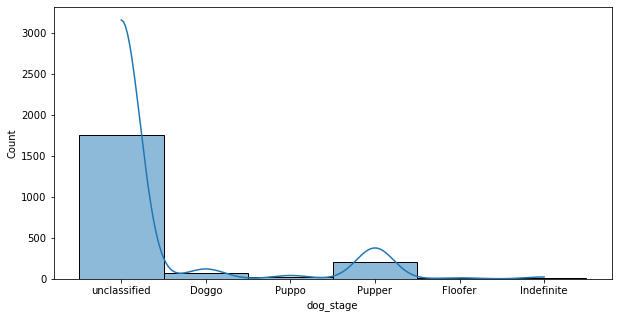

In [350]:
# plot histogram with df
plt.figure(figsize = (10,5))  # set figure size
sns.histplot(data=df, x='dog_stage', kde=True);

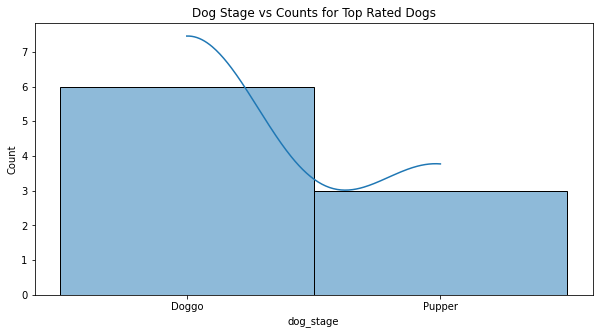

In [349]:
# Plot histogram with top_breed df
plt.figure(figsize = (10,5))  # set figure size
sns.histplot(data=top_breed, x='dog_stage', kde=True).set(title='Dog Stage vs Counts for Top Rated Dogs');

<b>Rationale:</b> Though majority of dogs from the original dataframe were not classified, Doggo, is the most prevalent stage for the top rated dogs.

<b>Question 4: Was there a correlation with the dog rating and number of retweeted tweet count and favorite count?</b>

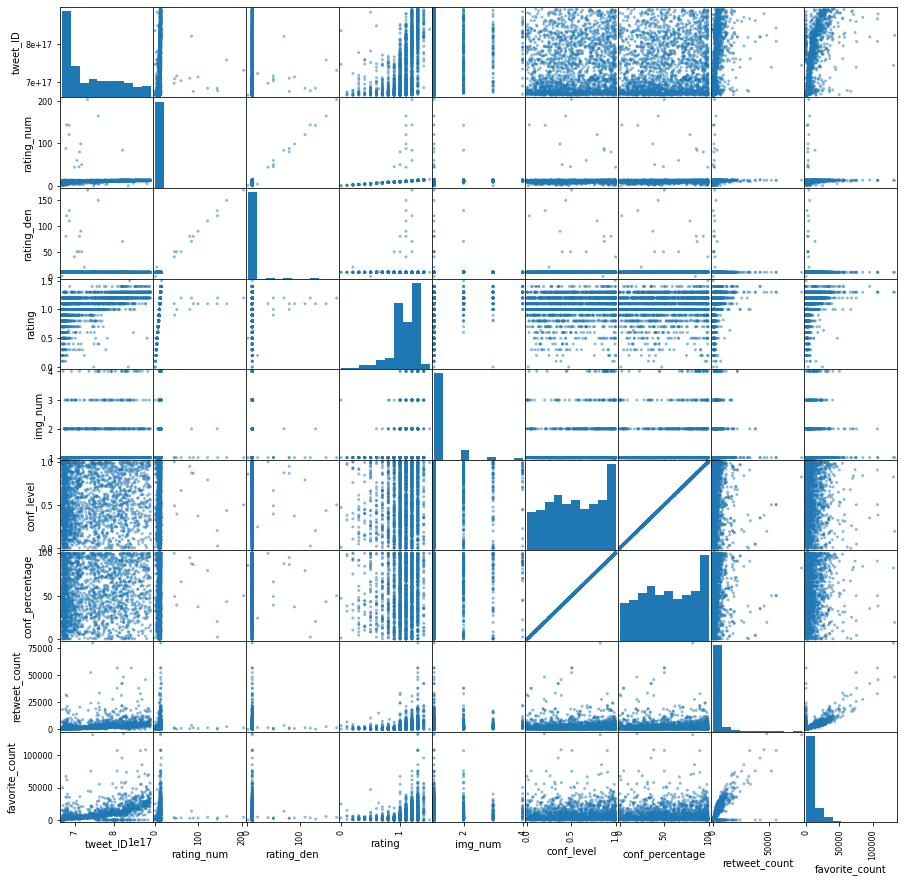

In [359]:
# General scatter plot preview of all variables in the df
pd.plotting.scatter_matrix(df, figsize = (15,15));

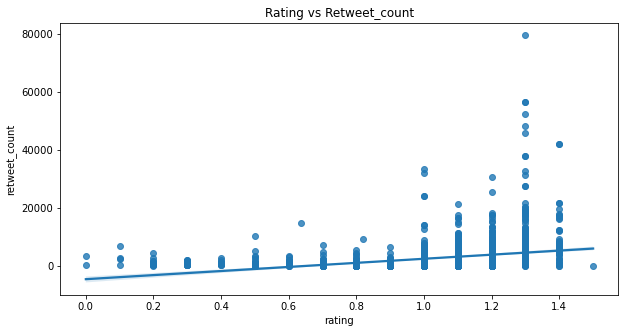

In [369]:
# scatter plot of rating as the independent variable against retweet count
plt.figure(figsize = (10,5))  # set figure size
sns.regplot(x='rating', y='retweet_count', data=df).set(title='Rating vs Retweet_count');

<b>Rationale:</b> A build up of positive correlation can be observed from rating 0.6 and somewhere 
    just above zero (0) retweet count, with some outliers.

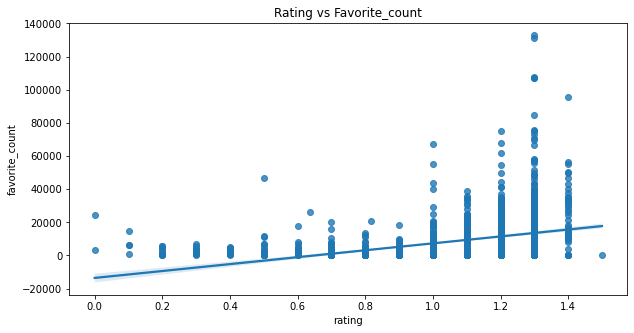

In [368]:
# scatter plot of rating as the independent variable against retweet count
plt.figure(figsize = (10,5))  # set figure size
sns.regplot(x='rating', y='favorite_count', data=df).set(title='Rating vs Favorite_count');

<b>Rationale:</b> There's a visible progressive positive correlation between the dog ratings and number of favorite counts.

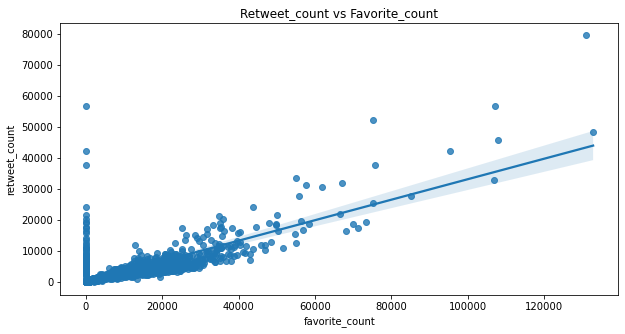

In [367]:
# scatter plot of favorite count against retweet count
plt.figure(figsize = (10,5))  # set figure size
sns.regplot(x='favorite_count', 
                y='retweet_count',
                data=df).set(title='Retweet_count vs Favorite_count');

<b>Rationale:</b> There seem to be an initial strong positive correlation between retweet and favorite count.

<i><b>Note:</b>Details of overall insights, conclusions and limitations are contained in the wrangle_report and act_report PDFs attached.</i>